In [41]:
!pip install gymnasium
# مكتبة التعامل مع الروبوتات
!pip install panda_gym
# مكتبة التعلم المعزز
!pip install stable-baselines3
# مكتبة الصور المتحركة
!pip install numpngw

In [42]:
import gymnasium as gym
# مكتبة التعامل مع الروبوتات
import panda_gym
# إنشاء بيئة العمل
env_id="PandaReach-v3"
#env_id="PandaPush-v3"
#env_id="PandaSlide-v3"
#env_id="PandaStack-v3"
env = gym.make(env_id, render_mode="rgb_array")

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# مسار مجلد العمل
working_folder='/content/drive/MyDrive/RLModels/'
# عدد دورات التدريب
total_timesteps=500000
# اسم النموذج المدرب
model_file_name=f"ppo_{env_id}_{total_timesteps}"
# مسار ملف النموذج المدرب
model_file_path = working_folder + model_file_name

In [45]:
# صنف التعلم المعزز
from stable_baselines3 import PPO
# تحميل النموذج المدرب
model=PPO.load(model_file_path)

In [46]:
# قائمة لتخزين المكافآت قبل التعلم
reward_history_before = []
# قائمة لتخزين المكافآت بعد التعلم
reward_history_after = []
# عدد الحلقات
n_eval_episodes = 32

In [47]:
# حلقات مع أفعال عشوائية
total_episodes_rewards=0
for episode in range(n_eval_episodes):
    obs, info = env.reset()
    done = False
    episode_reward = 0
    while not done:
        # فعل عشوائي
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        if terminated or truncated:
          done=True
    # إضافة إجمالي المكافآت لقائمة المكافآت
    reward_history_before.append(episode_reward)
    total_episodes_rewards+=episode_reward
    print(f"Before Training - Episode {episode + 1} - Total Reward: {episode_reward}")

Before Training - Episode 1 - Total Reward: -50.0
Before Training - Episode 2 - Total Reward: -50.0
Before Training - Episode 3 - Total Reward: -50.0
Before Training - Episode 4 - Total Reward: -50.0
Before Training - Episode 5 - Total Reward: -50.0
Before Training - Episode 6 - Total Reward: -50.0
Before Training - Episode 7 - Total Reward: -50.0
Before Training - Episode 8 - Total Reward: -50.0
Before Training - Episode 9 - Total Reward: 0.0
Before Training - Episode 10 - Total Reward: -50.0
Before Training - Episode 11 - Total Reward: -50.0
Before Training - Episode 12 - Total Reward: -50.0
Before Training - Episode 13 - Total Reward: -50.0
Before Training - Episode 14 - Total Reward: -50.0
Before Training - Episode 15 - Total Reward: -50.0
Before Training - Episode 16 - Total Reward: -50.0
Before Training - Episode 17 - Total Reward: -7.0
Before Training - Episode 18 - Total Reward: -50.0
Before Training - Episode 19 - Total Reward: -50.0
Before Training - Episode 20 - Total Reward

In [48]:
# وسطي مكافآت الحلقات
mean_reward = total_episodes_rewards / n_eval_episodes
print(f"Random Mean Reward: {mean_reward}")

Random Mean Reward: -42.8125


In [49]:
total_episodes_rewards = 0
# حلقات مع أفعال من النموذج المدرب
for ep in range(n_eval_episodes):
    obs, info = env.reset()
    done = False
    episode_reward = 0
    while not done:
        # الحصول على الفعل من النموذج المدرب
        action, _states = model.predict(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        if terminated or truncated:
          done=True
    total_episodes_rewards += episode_reward
    # إضافة إجمالي المكافآت لقائمة المكافآت
    reward_history_after.append(episode_reward)
    total_episodes_rewards+=episode_reward
    print(f"After Training - Episode {ep + 1} - Reward: {episode_reward}")

After Training - Episode 1 - Reward: -1.0
After Training - Episode 2 - Reward: -2.0
After Training - Episode 3 - Reward: -1.0
After Training - Episode 4 - Reward: -1.0
After Training - Episode 5 - Reward: -1.0
After Training - Episode 6 - Reward: -2.0
After Training - Episode 7 - Reward: 0.0
After Training - Episode 8 - Reward: -2.0
After Training - Episode 9 - Reward: -2.0
After Training - Episode 10 - Reward: -2.0
After Training - Episode 11 - Reward: -1.0
After Training - Episode 12 - Reward: -3.0
After Training - Episode 13 - Reward: -1.0
After Training - Episode 14 - Reward: -2.0
After Training - Episode 15 - Reward: -1.0
After Training - Episode 16 - Reward: -2.0
After Training - Episode 17 - Reward: -2.0
After Training - Episode 18 - Reward: -1.0
After Training - Episode 19 - Reward: -1.0
After Training - Episode 20 - Reward: -2.0
After Training - Episode 21 - Reward: -3.0
After Training - Episode 22 - Reward: -2.0
After Training - Episode 23 - Reward: -2.0
After Training - Epis

In [50]:
# وسطي مكافآت الحلقات
mean_reward = total_episodes_rewards / n_eval_episodes
print(f"RL Model Mean Reward: {mean_reward}")

RL Model Mean Reward: -3.125


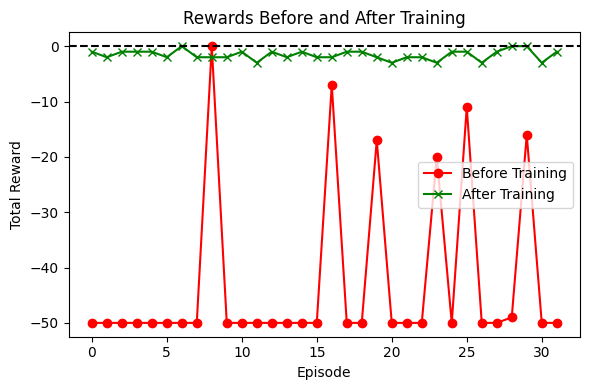

In [51]:
import matplotlib.pyplot as plt
# رسم المكافآت قبل وبعد التدريب
plt.figure(figsize=(6, 4))
plt.plot(reward_history_before, label='Before Training', color='red', linestyle='-', marker='o')
plt.plot(reward_history_after, label='After Training', color='green', linestyle='-', marker='x')

# تخصيص النموذج
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Rewards Before and After Training")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

# العرض
plt.tight_layout()
plt.show()

In [52]:
# دالة إنشاء صورة متحركة
from numpngw import write_apng

In [53]:
for ep in range(n_eval_episodes):
  # مؤشر الانتهاء
  done = False
  # قائمة لحفظ الصور المتتالية
  images = []
  # إجمالي مكافآت الحلقة الواحدة
  total_reward = 0
  # إعادة التهيئة
  obs, info = env.reset()
  # إضافة صورة البيئة
  images.append(env.render())
  while not done:
      # الحصول على الفعل من النموذج المدرب
      action, _states = model.predict(obs, deterministic=True)
      # تنفيذ الفعل
      obs, reward, terminated, truncated, info = env.step(action)
      # إضافة صورة البيئة
      images.append(env.render())
      # إضافة المكافأة الحالية لإجمالي المكافآت
      total_reward = total_reward + reward
      if terminated or truncated:
        done=True
  if total_reward>=-3 :
    break

In [54]:
# مسار مجلد الصور
clips_folder='/content/drive/MyDrive/RobotAnimation/'
# اسم ملف الصورة المتحركة
image_file_name=f"trained_{env_id}_animation.png"
# مسار ملف الصورة المتحركة
image_file_path = clips_folder + image_file_name
# إنشاء صورة متحركة من قائمة الصور
write_apng(image_file_path, images, delay=1000)

In [55]:
# دالة عرض الصور
from IPython.display import Image

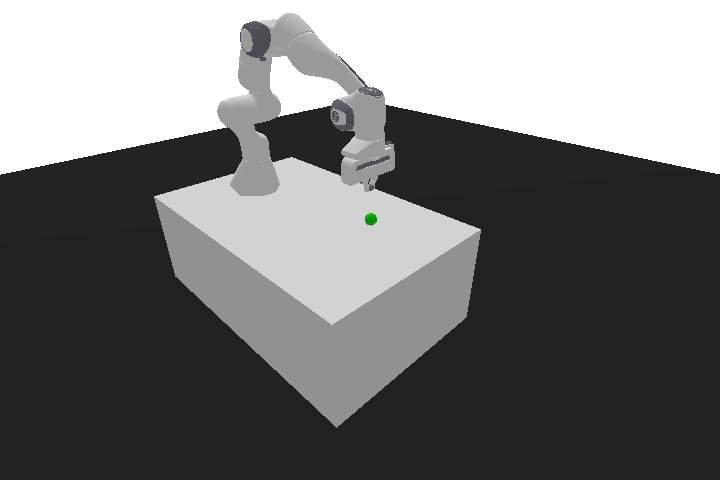

In [56]:
# إظهار الصورة المتحركة
Image(filename=image_file_path)

Random Mean Reward: -45.3125
RL Model Mean Reward: -40.25


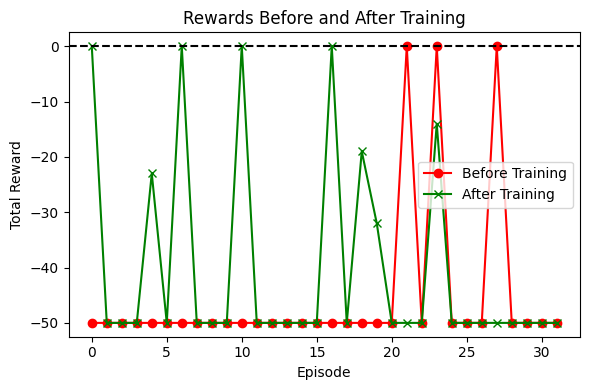

In [61]:
env_id="PandaPush-v3"
env = gym.make(env_id, render_mode="rgb_array")
# اسم النموذج المدرب
model_file_name=f"ppo_{env_id}_{total_timesteps}"
# مسار ملف النموذج المدرب
model_file_path = working_folder + model_file_name
# تحميل النموذج المدرب
model=PPO.load(model_file_path)
# تقييم بدون تدريب
# قائمة لتخزين المكافآت قبل التعلم
reward_history_before = []
# قائمة لتخزين المكافآت بعد التعلم
reward_history_after = []

# عدد الحلقات
n_eval_episodes = 32
# حلقات مع أفعال عشوائية
total_episodes_rewards=0
for episode in range(n_eval_episodes):
    obs, info = env.reset()
    done = False
    episode_reward = 0
    while not done:
        # فعل عشوائي
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        if terminated or truncated:
          done=True
    # إضافة إجمالي المكافآت لقائمة المكافآت
    reward_history_before.append(episode_reward)
    total_episodes_rewards+=episode_reward
# وسطي مكافآت الحلقات
mean_reward = total_episodes_rewards / n_eval_episodes
print(f"Random Mean Reward: {mean_reward}")

total_episodes_rewards = 0
# حلقات مع أفعال من النموذج المدرب
for ep in range(n_eval_episodes):
    obs, info = env.reset()
    done = False
    episode_reward = 0
    while not done:
        # الحصول على الفعل من النموذج المدرب
        action, _states = model.predict(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        if terminated or truncated:
          done=True
    total_episodes_rewards += episode_reward
    # إضافة إجمالي المكافآت لقائمة المكافآت
    reward_history_after.append(episode_reward)
# وسطي مكافآت الحلقات
mean_reward = total_episodes_rewards / n_eval_episodes
print(f"RL Model Mean Reward: {mean_reward}")


import matplotlib.pyplot as plt
# رسم المكافآت قبل وبعد التدريب
plt.figure(figsize=(6, 4))
plt.plot(reward_history_before, label='Before Training', color='red', linestyle='-', marker='o')
plt.plot(reward_history_after, label='After Training', color='green', linestyle='-', marker='x')

# تخصيص النموذج
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Rewards Before and After Training")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

# العرض
plt.tight_layout()
plt.show()


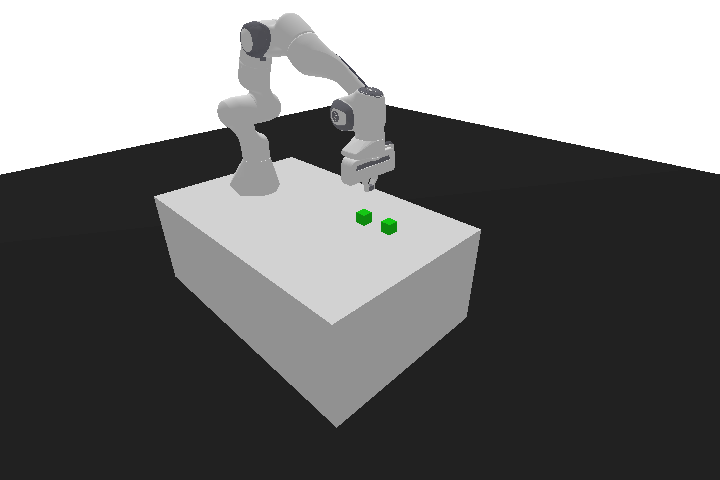

In [63]:
for ep in range(n_eval_episodes):
  # مؤشر الانتهاء
  done = False
  # قائمة لحفظ الصور المتتالية
  images = []
  # إجمالي مكافآت الحلقة الواحدة
  total_reward = 0
  # إعادة التهيئة
  obs, info = env.reset()
  # إضافة صورة البيئة
  images.append(env.render())
  while not done:
      # الحصول على الفعل من النموذج المدرب
      action, _states = model.predict(obs, deterministic=True)
      # تنفيذ الفعل
      obs, reward, terminated, truncated, info = env.step(action)
      # إضافة صورة البيئة
      images.append(env.render())
      # إضافة المكافأة الحالية لإجمالي المكافآت
      total_reward = total_reward + reward
      if terminated or truncated:
        done=True
  if total_reward>=-30 :
    break
# مسار مجلد الصور
working_folder='/content/drive/MyDrive/RobotAnimation/'
# اسم ملف الصورة المتحركة
image_file_name=f"trained_{env_id}_animation.png"
# مسار ملف الصورة المتحركة
image_file_path = working_folder + image_file_name
# إنشاء صورة متحركة من قائمة الصور
write_apng(image_file_path, images, delay=1000)
# إظهار الصورة المتحركة
Image(filename=image_file_path)